Problem 3: Use R to Build PCA model using function princomp() for the weather data set posted with the assignment.
Helpful URL: https://www.datacamp.com/community/tutorials/pca-analysis-r

In [24]:
library(dplyr)
library(ggplot2)

In [25]:
df <- read.csv("https://raw.githubusercontent.com/Cbhami/Coraline/master/Resources/csv%20data/user94403143_workout_history.csv", header=TRUE)

In [26]:
head(df)

,Date.Submitted,Workout.Date,Activity.Type,Calories.Burned..kCal.,Distance..mi.,Workout.Time..seconds.,Avg.Pace..min.mi.,Max.Pace..min.mi.,Avg.Speed..mi.h.,Max.Speed..mi.h.,Avg.Heart.Rate,Steps,Notes,Source,Link
,<chr>,<chr>,<chr>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<chr>,<chr>,<chr>
1,"Sept. 11, 2022","Sept. 11, 2022",Run,459,3.65871,2273,10.34970,0.467083,5.79725,128.45700,146,6002,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyrun.com/workout/6839610871
2,"Sept. 7, 2022","Sept. 7, 2022",Run,655,4.90000,2844,9.67347,0.000000,6.20253,0.00000,NA,7554,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyrun.com/workout/6830915665
3,"Sept. 5, 2022","Sept. 5, 2022",Run,629,5.01163,3964,13.17910,0.404884,4.55266,148.19000,125,8485,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyrun.com/workout/6827565649
4,"Sept. 4, 2022","Sept. 4, 2022",Run,491,3.74725,2584,11.48890,1.280260,5.22242,46.86560,143,6236,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyrun.com/workout/6825445066
5,"Sept. 3, 2022","Sept. 3, 2022",Run,601,4.50081,2941,10.88770,2.253920,5.51079,26.62030,151,7436,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyrun.com/workout/6823489405
6,"Sept. 2, 2022","Sept. 2, 2022",Indoor Run / Jog,800,5.85000,3600,10.25640,10.419200,5.85000,5.75858,133,9604,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyrun.com/workout/6821006155


In [27]:
df.numeric <- select_if(df, is.numeric)

In [28]:
df2 <- data.frame(t(na.omit(t(df.numeric))))

In [29]:
df.pca <- prcomp(df2, center = TRUE, scale. = TRUE)

In [30]:
summary (df.pca)

Importance of components:
                          PC1    PC2    PC3    PC4     PC5    PC6     PC7
Standard deviation     1.7176 1.2128 1.0093 0.9528 0.75873 0.2367 0.14375
Proportion of Variance 0.4214 0.2101 0.1455 0.1297 0.08224 0.0080 0.00295
Cumulative Proportion  0.4214 0.6316 0.7771 0.9068 0.98905 0.9970 1.00000

In [31]:
head(df.pca$x)

PC1,PC2,PC3,PC4,PC5,PC6,PC7
-0.4803989,-0.1374291,0.55923040,-0.26115239,-0.03387217,-0.02620906,-0.01836309
-1.4643680,-0.2147901,-0.32629364,0.39061171,0.01842267,-0.17027776,0.02709509
-1.7148456,1.1187359,0.63198515,-0.05847772,-0.41703333,0.19682598,0.01723068
-0.5285902,0.2538303,0.02393921,0.14160144,-0.17243408,-0.01966562,0.02274545
-1.1507320,0.2505210,-0.26640381,0.13318553,-0.13491148,-0.08332714,0.04040309
-2.1831401,0.5838016,-1.18197038,-0.55368013,-0.03488698,-0.23286405,0.07180917


In [32]:
str(df.pca)

List of 5
 $ sdev    : num [1:7] 1.718 1.213 1.009 0.953 0.759 ...
 $ rotation: num [1:7, 1:7] -0.5704 -0.5748 -0.5099 0.1275 0.0892 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:7] "Calories.Burned..kCal." "Distance..mi." "Workout.Time..seconds." "Avg.Pace..min.mi." ...
  .. ..$ : chr [1:7] "PC1" "PC2" "PC3" "PC4" ...
 $ center  : Named num [1:7] 401.77 3.17 2087.09 11.43 2.15 ...
  ..- attr(*, "names")= chr [1:7] "Calories.Burned..kCal." "Distance..mi." "Workout.Time..seconds." "Avg.Pace..min.mi." ...
 $ scale   : Named num [1:7] 257.86 2 1287.85 6.94 7.66 ...
  ..- attr(*, "names")= chr [1:7] "Calories.Burned..kCal." "Distance..mi." "Workout.Time..seconds." "Avg.Pace..min.mi." ...
 $ x       : num [1:731, 1:7] -0.48 -1.464 -1.715 -0.529 -1.151 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : NULL
  .. ..$ : chr [1:7] "PC1" "PC2" "PC3" "PC4" ...
 - attr(*, "class")= chr "prcomp"


In [33]:
library(devtools)
install_github("vqv/ggbiplot")

Skipping install of 'ggbiplot' from a github remote, the SHA1 (7325e880) has not changed since last install.
  Use `force = TRUE` to force installation



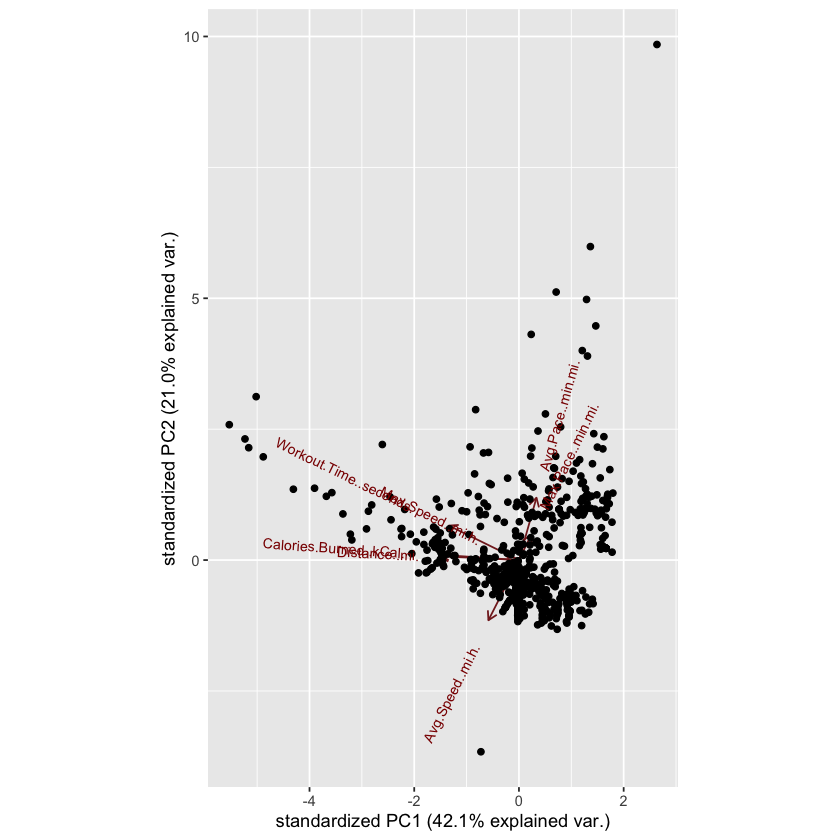

In [34]:
library(ggbiplot)

ggbiplot(df.pca)

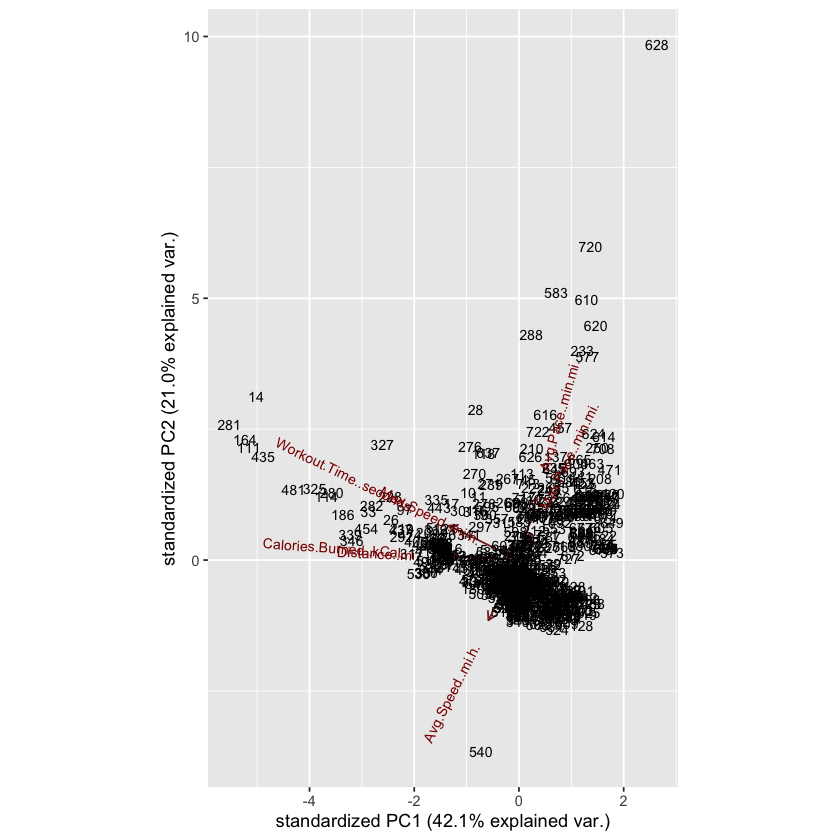

In [35]:
ggbiplot(df.pca, labels=rownames(df))


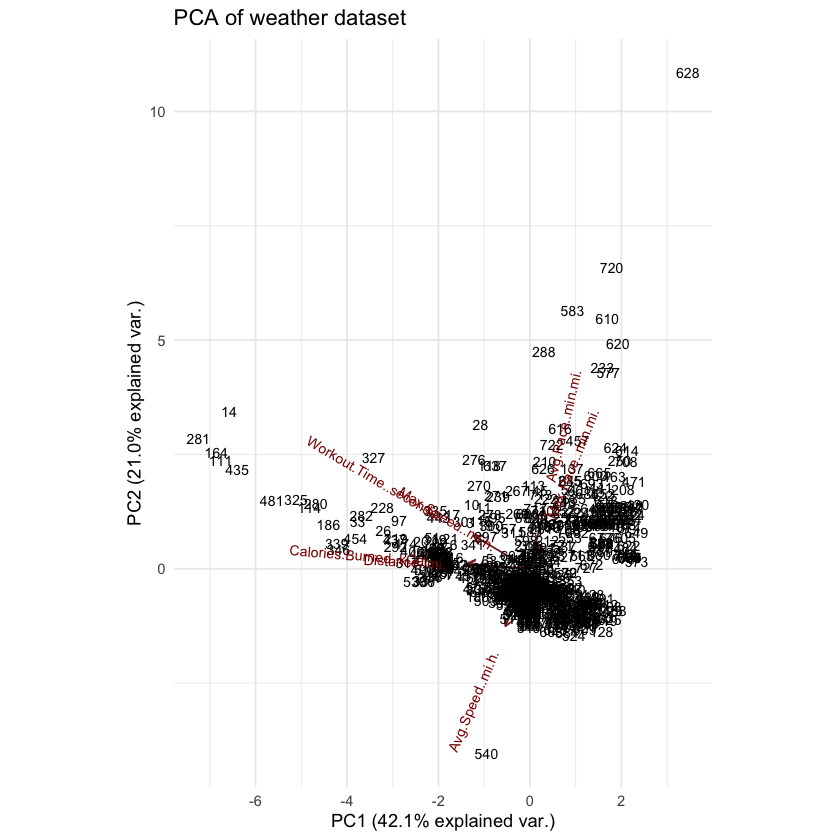

In [36]:
ggbiplot(df.pca,ellipse=TRUE,obs.scale = .5, var.scale = .5,  labels=rownames(df), groups=df$RainToday) +
  scale_colour_manual(name="Origin", values= c("dark blue", "orange", "red3"))+
  ggtitle("PCA of weather dataset")+
  theme_minimal()+
  theme(legend.position = "bottom")

In [37]:
head(df, 1)

,Date.Submitted,Workout.Date,Activity.Type,Calories.Burned..kCal.,Distance..mi.,Workout.Time..seconds.,Avg.Pace..min.mi.,Max.Pace..min.mi.,Avg.Speed..mi.h.,Max.Speed..mi.h.,Avg.Heart.Rate,Steps,Notes,Source,Link
,<chr>,<chr>,<chr>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<chr>,<chr>,<chr>
1,"Sept. 11, 2022","Sept. 11, 2022",Run,459,3.65871,2273,10.3497,0.467083,5.79725,128.457,146,6002,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyrun.com/workout/6839610871


In [38]:
df <- df %>% mutate(mileage = cut(Distance..mi., breaks=c(0, 3.09, 6.19, 9.99, 13.09, 20), labels=c("Short", "FiveK", "TenK", "TenM", "HalfMar")))

In [40]:
df <- df %>% mutate(mileage2 = cut(Distance..mi., breaks=c(0, 3.09, 20), labels=c("Short", "FiveKplus")))

In [41]:
head(df, 1)

,Date.Submitted,Workout.Date,Activity.Type,Calories.Burned..kCal.,Distance..mi.,Workout.Time..seconds.,Avg.Pace..min.mi.,Max.Pace..min.mi.,Avg.Speed..mi.h.,Max.Speed..mi.h.,Avg.Heart.Rate,Steps,Notes,Source,Link,mileage,mileage2
,<chr>,<chr>,<chr>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<chr>,<chr>,<chr>,<fct>,<fct>
1,"Sept. 11, 2022","Sept. 11, 2022",Run,459,3.65871,2273,10.3497,0.467083,5.79725,128.457,146,6002,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyrun.com/workout/6839610871,FiveK,FiveKplus


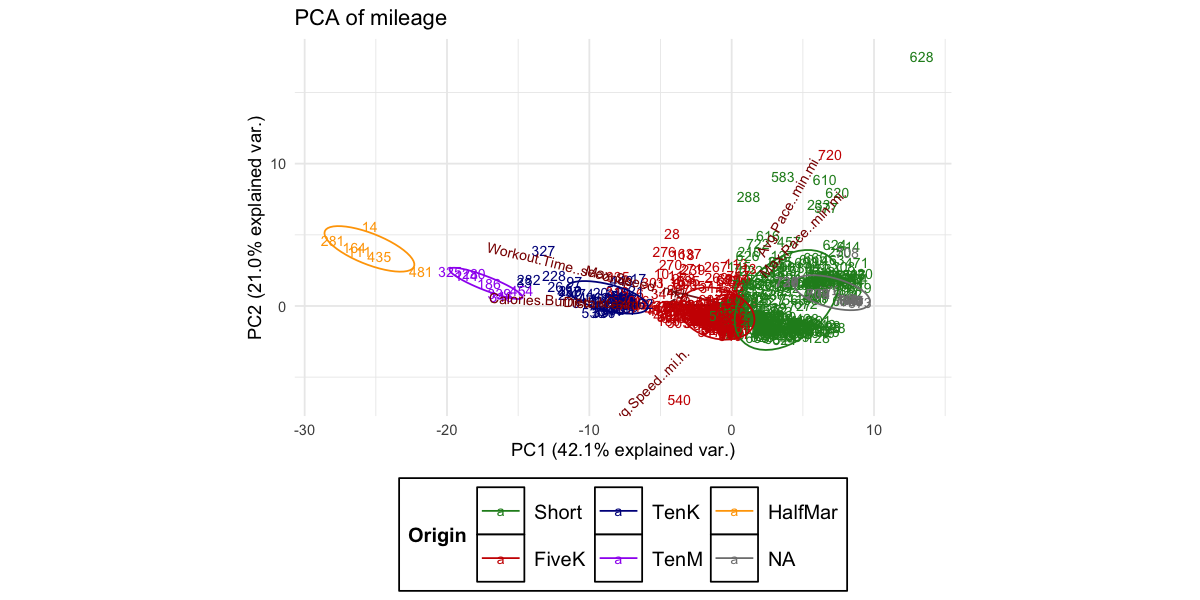

In [126]:
ggbiplot(df.pca,ellipse=TRUE,obs.scale = 3, var.scale = 3,  labels=rownames(df), groups=df$mileage) +
  scale_colour_manual(name="Origin", values= c("forest green", "red3", "dark blue", "purple", "orange"))+
  ggtitle("PCA of mileage")+
  theme_minimal()+
  theme(legend.position = "bottom") +
  theme(legend.title = element_text(size=12, face="bold")) +
  theme(legend.text = element_text(size=12)) +
  theme(legend.key.size = unit(1, "cm")) +
  theme(legend.key = element_rect(fill = "white", colour = "black")) +
  theme(legend.background = element_rect(fill = "white", colour = "black")) +
  theme(legend.key.height = unit(1, "cm")) +
  theme(legend.key.width = unit(1, "cm")) 

In [46]:
summary (df.pca)

Importance of components:
                          PC1    PC2    PC3    PC4     PC5    PC6     PC7
Standard deviation     1.7176 1.2128 1.0093 0.9528 0.75873 0.2367 0.14375
Proportion of Variance 0.4214 0.2101 0.1455 0.1297 0.08224 0.0080 0.00295
Cumulative Proportion  0.4214 0.6316 0.7771 0.9068 0.98905 0.9970 1.00000

##### Problem 3


1. Weights are normalized Weights <br>
2. Variance is explained as follows: 42%, 21%, 15%, 13%, 8%, 2% <br>
3. PC1:PC3 account for approximately 80% of the variance <br>

In [48]:
summary(df.pca)

Importance of components:
                          PC1    PC2    PC3    PC4     PC5    PC6     PC7
Standard deviation     1.7176 1.2128 1.0093 0.9528 0.75873 0.2367 0.14375
Proportion of Variance 0.4214 0.2101 0.1455 0.1297 0.08224 0.0080 0.00295
Cumulative Proportion  0.4214 0.6316 0.7771 0.9068 0.98905 0.9970 1.00000

#### Attempt #2

In [51]:
data <- read.csv("https://raw.githubusercontent.com/Cbhami/Coraline/master/Resources/csv%20data/user94403143_workout_history.csv", header=TRUE)

In [52]:
library(dplyr)

In [53]:
data2 <- select_if(data, is.numeric)
dataframe <- data.frame(t(na.omit(t(data2))))
data.pr <- prcomp(dataframe, scale = TRUE, center = TRUE)
summary(data.pr)

Importance of components:
                          PC1    PC2    PC3    PC4     PC5    PC6     PC7
Standard deviation     1.7176 1.2128 1.0093 0.9528 0.75873 0.2367 0.14375
Proportion of Variance 0.4214 0.2101 0.1455 0.1297 0.08224 0.0080 0.00295
Cumulative Proportion  0.4214 0.6316 0.7771 0.9068 0.98905 0.9970 1.00000

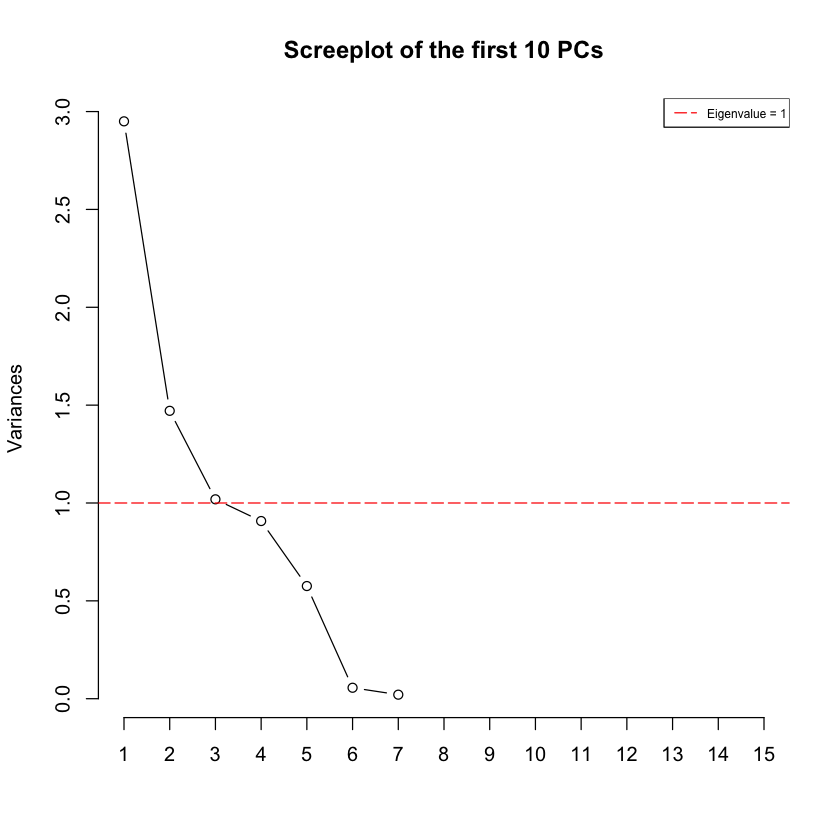

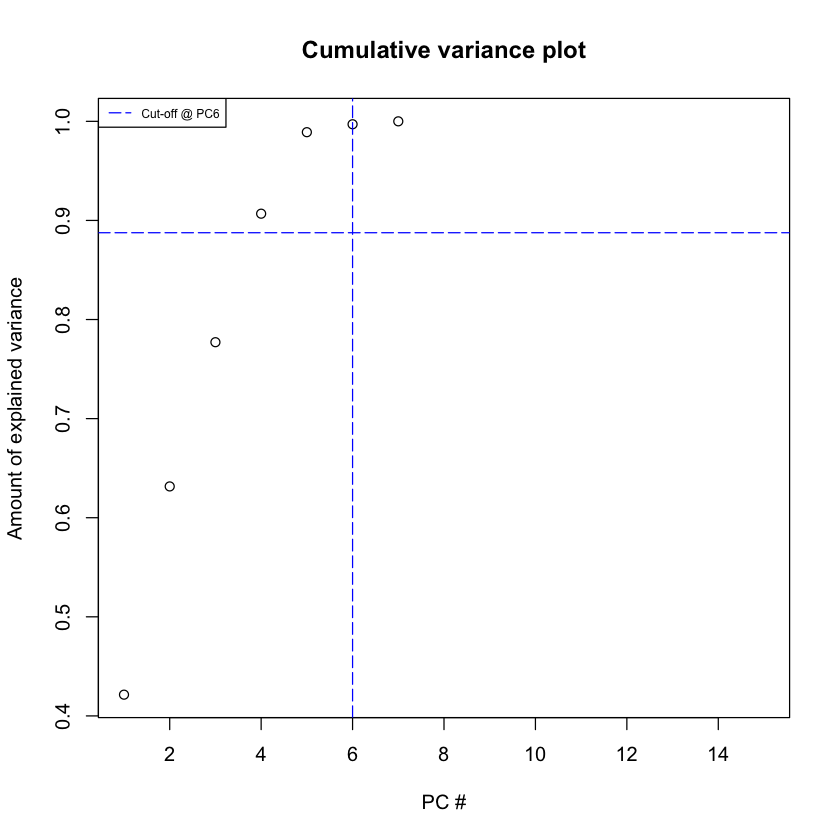

In [54]:
screeplot(data.pr, type = "l", npcs = 15, main = "Screeplot of the first 10 PCs")
abline(h = 1, col="red", lty=5)
legend("topright", legend=c("Eigenvalue = 1"),
       col=c("red"), lty=5, cex=0.6)
cumpro <- cumsum(data.pr$sdev^2 / sum(data.pr$sdev^2))
plot(cumpro[0:15], xlab = "PC #", ylab = "Amount of explained variance", main = "Cumulative variance plot")
abline(v = 6, col="blue", lty=5)
abline(h = 0.88759, col="blue", lty=5)
legend("topleft", legend=c("Cut-off @ PC6"),
       col=c("blue"), lty=5, cex=0.6)

In [56]:
library(dplyr)
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ tibble  3.1.8     ✔ purrr   0.3.4
✔ tidyr   1.2.0     ✔ stringr 1.4.1
✔ readr   2.1.2     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ plyr::arrange()     masks dplyr::arrange()
✖ readr::col_factor() masks scales::col_factor()
✖ purrr::compact()    masks plyr::compact()
✖ plyr::count()       masks dplyr::count()
✖ purrr::discard()    masks scales::discard()
✖ plyr::failwith()    masks dplyr::failwith()
✖ dplyr::filter()     masks stats::filter()
✖ plyr::id()          masks dplyr::id()
✖ dplyr::lag()        masks stats::lag()
✖ plyr::mutate()      masks dplyr::mutate()
✖ plyr::rename()      masks dplyr::rename()
✖ plyr::summarise()   masks dplyr::summarise()
✖ plyr::summarize()   masks dplyr::summarize()


In [57]:
data2 <- select_if(data, is.numeric)
data.df <- data.frame(t(na.omit(t(data2))))
data.pca <- prcomp(data.df, center = TRUE, scale. = TRUE)

In [58]:
data.pca$rotation <- -1 * data.pca$rotation

In [59]:
data.pca$rotation

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
Calories.Burned..kCal.,0.57039591,-0.05417808,0.08199480,-0.026619167,0.028303389,0.633884618,-0.511537603
Distance..mi.,0.57483274,-0.04022160,0.07731637,-0.005976691,-0.067287578,0.119252415,0.801989555
Workout.Time..seconds.,0.50988468,-0.35479378,0.02853248,-0.065836938,0.148858787,-0.717916600,-0.267258669
Avg.Pace..min.mi.,-0.12746641,-0.64191865,-0.12476941,-0.210295105,-0.709055786,0.095523280,-0.004064032
Max.Pace..min.mi.,-0.08916068,-0.26052356,0.59802137,0.748921651,-0.074290941,0.008349864,-0.008705302
Avg.Speed..mi.h.,0.22200603,0.61975839,0.05690803,0.129913533,-0.681293576,-0.242311790,-0.153690849
Max.Speed..mi.h.,0.10367954,-0.07440290,-0.78105662,0.610684861,0.008495464,0.025602485,-0.001289518


In [60]:
data.pca$x <- -1 * data.pca$x

In [61]:
head(data.pca$x, 10)

PC1,PC2,PC3,PC4,PC5,PC6,PC7
0.4803989,0.1374291,-0.55923040,0.26115239,0.033872171,0.02620906,0.018363090
1.4643680,0.2147901,0.32629364,-0.39061171,-0.018422666,0.17027776,-0.027095086
1.7148456,-1.1187359,-0.63198515,0.05847772,0.417033328,-0.19682598,-0.017230683
0.5285902,-0.2538303,-0.02393921,-0.14160144,0.172434084,0.01966562,-0.022745446
1.1507320,-0.2505210,0.26640381,-0.13318553,0.134911480,0.08332714,-0.040403087
2.1831401,-0.5838016,1.18197038,0.55368013,0.034886981,0.23286405,-0.071809167
1.5546490,0.1848127,0.33615616,-0.39737870,-0.009822773,0.17703951,-0.026183500
-0.1015443,0.4298661,0.85829677,0.67180653,-0.273358620,0.04733364,-0.059838897
-0.1115647,0.2900263,0.90997566,0.71532252,-0.224260567,0.06000240,-0.062092245
1.6675869,-1.5568988,0.81902979,0.09868934,0.389375884,-0.37036958,-0.002028131


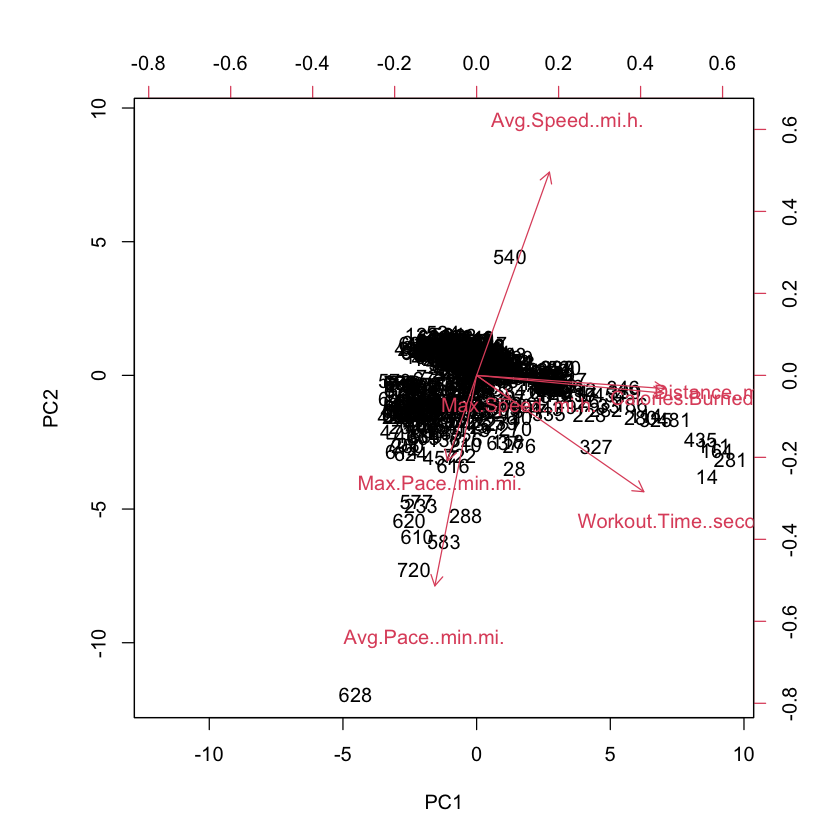

In [62]:
biplot(data.pca, scale = 0)

In [64]:
head(data[order(-data$Distance..mi.	),],)

,Date.Submitted,Workout.Date,Activity.Type,Calories.Burned..kCal.,Distance..mi.,Workout.Time..seconds.,Avg.Pace..min.mi.,Max.Pace..min.mi.,Avg.Speed..mi.h.,Max.Speed..mi.h.,Avg.Heart.Rate,Steps,Notes,Source,Link
,<chr>,<chr>,<chr>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<chr>,<chr>,<chr>
281,"April 21, 2021","April 21, 2021",Run,1928,13.4816,10191,12.59780,0.475306,4.76272,126.23400,144,22719,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyrun.com/workout/5692867222
435,"May 30, 2020","May 30, 2020",Run,1508,13.4344,8767,10.87400,0.133908,5.51773,448.06700,145,23604,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyrun.com/workout/4349658607
164,"Dec. 5, 2021","Dec. 5, 2021",Run,1876,13.1300,9540,12.10870,1.350430,4.95512,44.43030,148,22488,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyrun.com/workout/6266963680
481,"April 11, 2020","April 11, 2020",Run,1377,13.1200,7844,9.96334,1.099410,6.02208,54.57450,150,21427,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyrun.com/workout/4159120753
14,"Aug. 20, 2022","Aug. 20, 2022",Run,1544,13.1100,11065,14.06690,7.711150,4.26534,7.78094,140,22531,b'',Map My Fitness MapMyRun iPhone,http://www.mapmyrun.com/workout/6793063441
111,"March 6, 2022","March 6, 2022",Run,1854,13.1000,9189,11.69080,0.679514,5.13222,88.29840,156,22087,b'Run the Alamo Half Marathon',Map My Fitness MapMyRun iPhone,http://www.mapmyrun.com/workout/6429988507


In [65]:
data.pca$sdev^2 / sum(data.pca$sdev^2)
#The first PC explains 36% of the variance, the second PC explains 22% of the variance, and the third PC explains 13% of the variance.

[1] 0.421440691 0.210138529 0.145540873 0.129687915 0.082238103 0.008001998
[7] 0.002951892

In [66]:
var_explained = data.pca$sdev^2 / sum(data.pca$sdev^2)

In [68]:
qplot (c(1:14), var_explained)+
 geom_line() +
  labs(x = "Principal Component", y = "Variance Explained") + 
  ggtitle("Variance Explained by Principal Components") +
    theme(plot.title = element_text(hjust = 0.5)) +
    ylim(0, 1)

ERROR while rich displaying an object: Error in `check_aesthetics()`:
! Aesthetics must be either length 1 or the same as the data (14): y

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
6. repr::mime2repr[[mime]](obj)
7. repr_t

# Part 2

In [69]:
matrix.data <- c(1, 2, 3, 4, 5, 6, 7, 8, 9)

In [71]:
matrix <- matrix(matrix.data, nrow = 3, ncol = 3, byrow = TRUE)

In [72]:
matrix1 <-data.frame(matrix)

In [73]:
matrix1

X1,X2,X3
<dbl>,<dbl>,<dbl>
1,2,3
4,5,6
7,8,9


In [74]:
matrix <- data.frame(matrix(ncol=3,nrow=4, dimnames=list(NULL, c("Program", "CPU Time", "Disk I/O"))))


In [75]:
matrix

Program,CPU.Time,Disk.I.O
<lgl>,<lgl>,<lgl>
NA,NA,NA
NA,NA,NA
NA,NA,NA
NA,NA,NA


In [76]:
matrix2 <- data.frame(Program = c("P1", "P2", "P3", "P4"),
                        CPU.Time = c(5, 6, 4, 8),
                        "Disk I/O" = c(8, 10, 7, 12)
                        )


In [77]:
matrix2

Program,CPU.Time,Disk.I.O
<chr>,<dbl>,<dbl>
P1,5,8
P2,6,10
P3,4,7
P4,8,12


In [78]:
install.packages("ggdendro")


The downloaded binary packages are in
	/var/folders/91/qzryrsqs0vbcqrpddb7gb_c80000gn/T//RtmpwyaqAA/downloaded_packages


In [79]:
m1 <- as.matrix(matrix2)

In [80]:
library(ggdendro)
library(ggplot2)

In [81]:
#install.packages("GraphClusterAnalysis")
#install.packages("RBGL")
install.packages("igraph")
#install.packages("graph")
#library(GraphClusterAnalysis)
#library(RBGL)
library(igraph)
#library(graph)


The downloaded binary packages are in
	/var/folders/91/qzryrsqs0vbcqrpddb7gb_c80000gn/T//RtmpwyaqAA/downloaded_packages



Attaching package: ‘igraph’


The following objects are masked from ‘package:purrr’:

    compose, simplify


The following object is masked from ‘package:tidyr’:

    crossing


The following object is masked from ‘package:tibble’:

    as_data_frame


The following objects are masked from ‘package:dplyr’:

    as_data_frame, groups, union


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union




In [82]:
g <- sample_gnp(100, 3/100)
g_mst <- mst(g)

In [83]:
g_mst

IGRAPH 4a64017 U--- 100 92 -- Erdos-Renyi (gnp) graph
+ attr: name (g/c), type (g/c), loops (g/l), p (g/n)
+ edges from 4a64017:
 [1]  5--12  2--17 14--29 20--33 14--34 26--34 10--35 15--35 33--35  1--36
[11]  8--36 19--36 33--36  9--38  1--41 17--41 29--43 22--45 42--51  8--53
[21]  1--54 16--55 35--55  4--56 13--58  3--60 28--60 13--61 17--62 37--62
[31] 44--62 41--64 21--65 64--65 51--66 27--67  6--69  8--69 52--69 41--70
[41] 56--70 14--71 39--73 13--74  9--75 38--76 33--77 45--77 67--77 56--78
[51] 17--79 40--79 46--79 25--80 13--81 23--81 36--81 51--81 59--81 11--82
[61] 49--82 69--82 18--83 33--83 48--83 60--84 30--85 68--85 55--86  7--87
[71] 33--87 73--88 43--89 19--91 38--91 41--92 47--92 57--92 63--92  5--93
+ ... omitted several edges

In [84]:
install.packages('optrees')

Warning message:
“package ‘optrees’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”


In [85]:
install.packages('emstreeR')
library(emstreeR)


The downloaded binary packages are in
	/var/folders/91/qzryrsqs0vbcqrpddb7gb_c80000gn/T//RtmpwyaqAA/downloaded_packages


Please, do not forget to appropriately cite 'emstreeR' when using it in an academic research. See citation(package = 'emstreeR').



In [86]:
m1

Program,CPU.Time,Disk.I.O
P1,5,8
P2,6,10
P3,4,7
P4,8,12


[INFO ] Building tree.
[INFO ] Calculating minimum spanning tree.
[INFO ] 3 edges found so far.
[INFO ] 5 cumulative base cases.
[INFO ] 13 cumulative node combinations scored.
[INFO ] Total spanning tree length: 6.47871


CPU.Time,Disk.I.O,from,to,distance
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
5,8,1,3,1.414214
6,10,1,2,2.236068
4,7,2,4,2.828427
8,12,1,1,0.000000


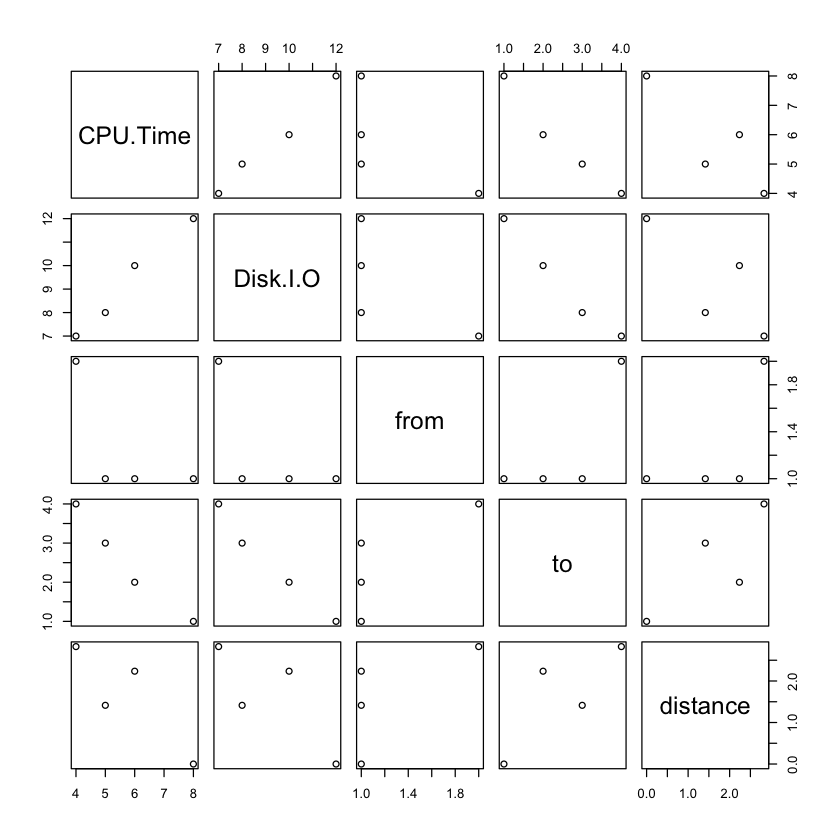

In [87]:
out <- ComputeMST(m1[,2:3])
out
plot(out)

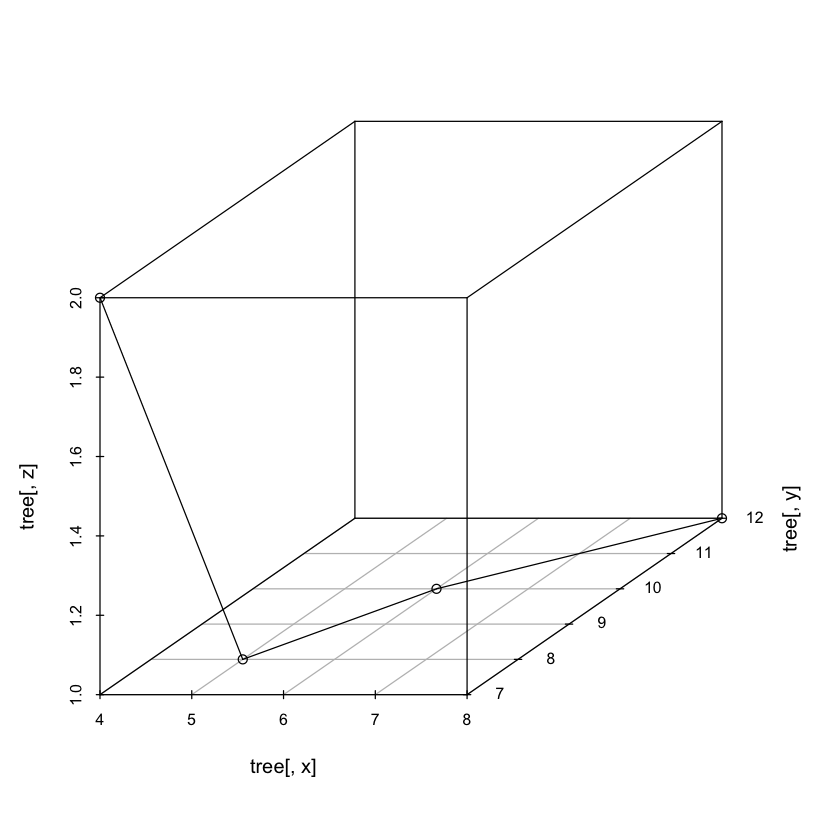

In [88]:
plotMST3D(out)

In [89]:
m2 <- stat_MST(data = out)



In [90]:
m2

geom_segment: na.rm = FALSE
stat_mst: na.rm = FALSE
position_identity 

https://cran.r-project.org/web/packages/emstreeR/emstreeR.pdf

In [91]:
library(ggplot2)
library(ggdendro)


In [92]:
hc <- hclust(dist(m1))

Warning message in dist(m1):
“NAs introduced by coercion”


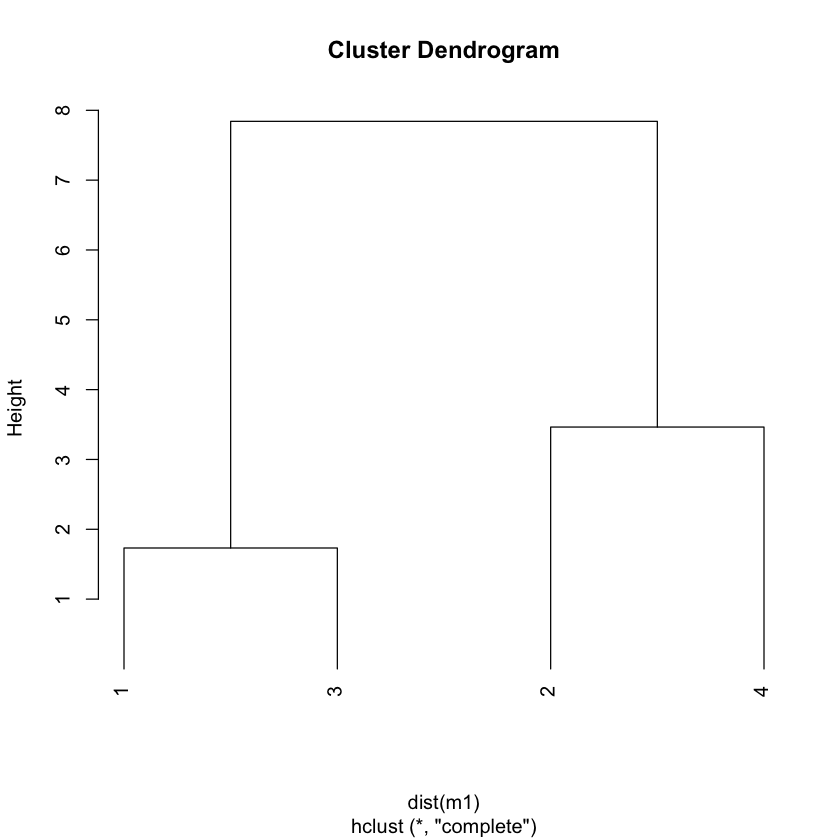

In [93]:
plot(hc, hang = -1)

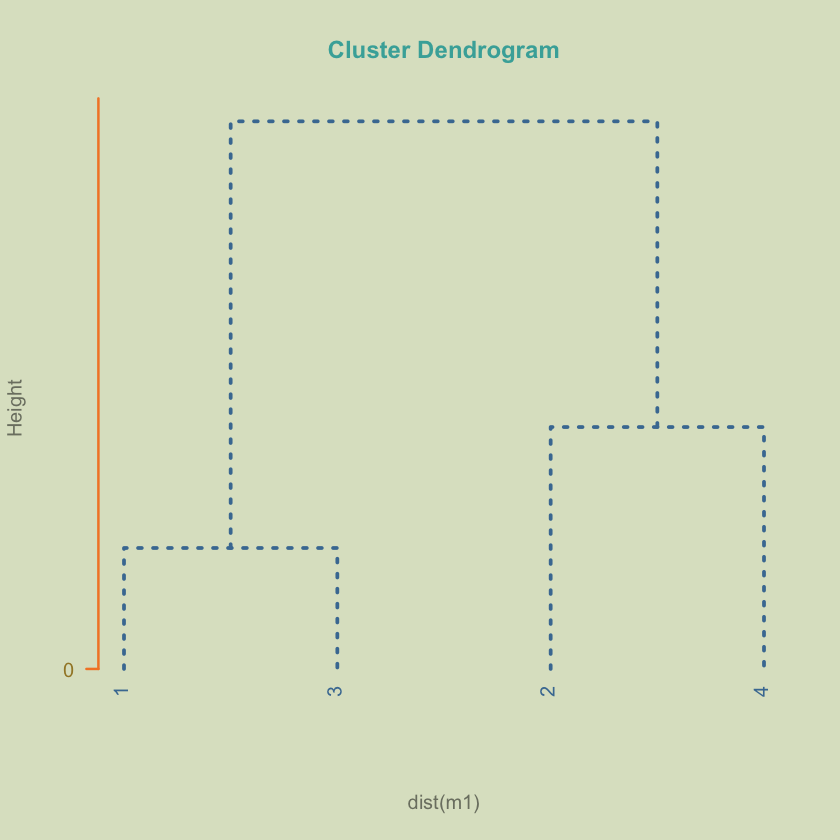

In [94]:
# set background color
op = par(bg = "#DDE3CA")
# plot dendrogram
plot(hc, col = "#487AA1", col.main = "#45ADA8", col.lab = "#7C8071",
     col.axis = "#F38630", lwd = 3, lty = 3, sub = '', hang = -1, axes = FALSE)
# add axis
axis(side = 2, at = seq(0, 400, 100), col = "#F38630",
     labels = FALSE, lwd = 2)
# add text in margin
mtext(seq(0, 400, 100), side = 2, at = seq(0, 400, 100),
      line = 1, col = "#A38630", las = 2)

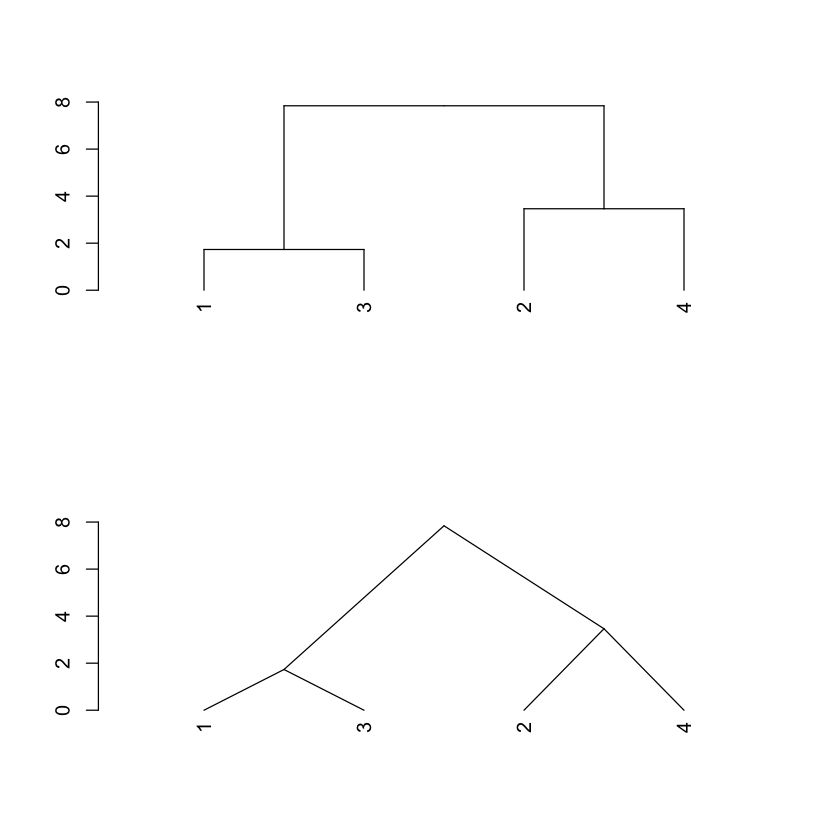

In [95]:
# using dendrogram objects
hcd = as.dendrogram(hc)

# alternative way to get a dendrogram
op = par(mfrow = c(2, 1))
plot(hcd)

# triangular dendrogram
plot(hcd, type = "triangle")

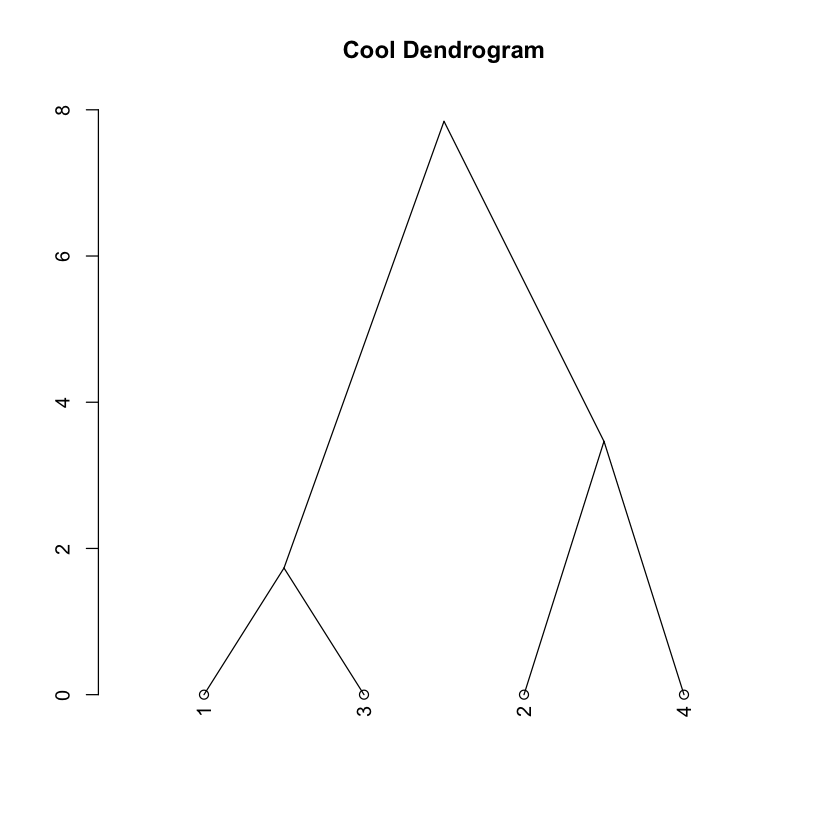

In [96]:
# vector of colors
labelColors = c("#CDB380", "#036564", "#EB6841", "#EDC951")

# cut dendrogram in 4 clusters
clusMember = cutree(hc, 4)

# function to get color labels
colLab <- function(n) {
  if (is.leaf(n)) {
    a <- attributes(n)
    labCol <- labelColors[clusMember[which(names(clusMember) == a$label)]]
    attr(n, "nodePar") <- c(a$nodePar, lab.col = labCol)
  }
  n
}

# using dendrapply
clusDendro = dendrapply(hcd, colLab)

# make plot
plot(clusDendro, main = "Cool Dendrogram", type = "triangle")

In [97]:
install.packages("ape")


The downloaded binary packages are in
	/var/folders/91/qzryrsqs0vbcqrpddb7gb_c80000gn/T//RtmpwyaqAA/downloaded_packages



Attaching package: ‘ape’


The following objects are masked from ‘package:igraph’:

    degree, edges, mst, ring




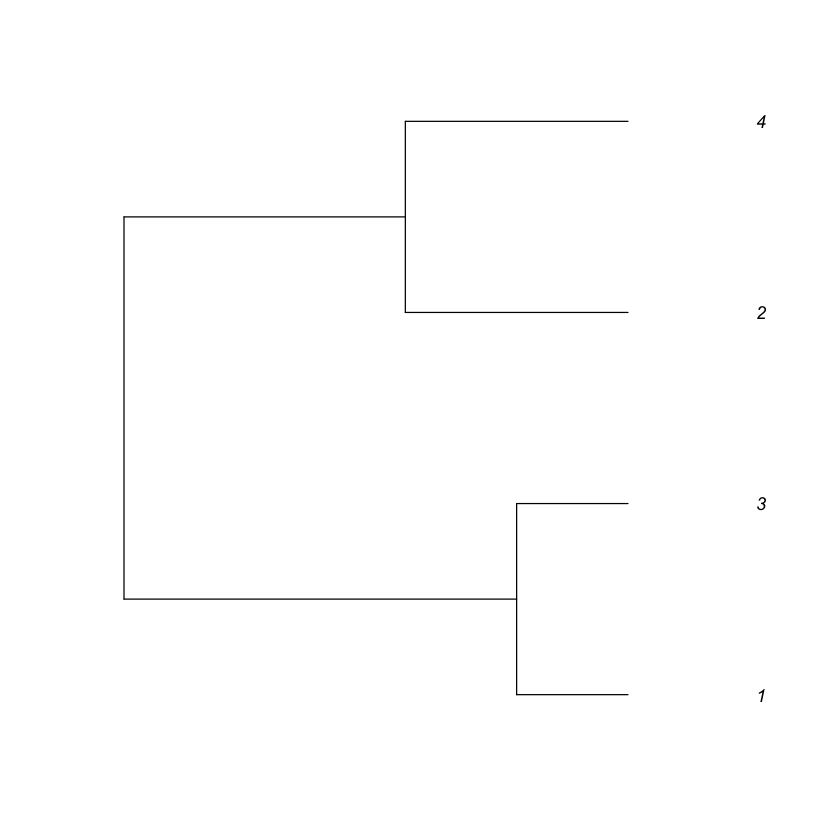

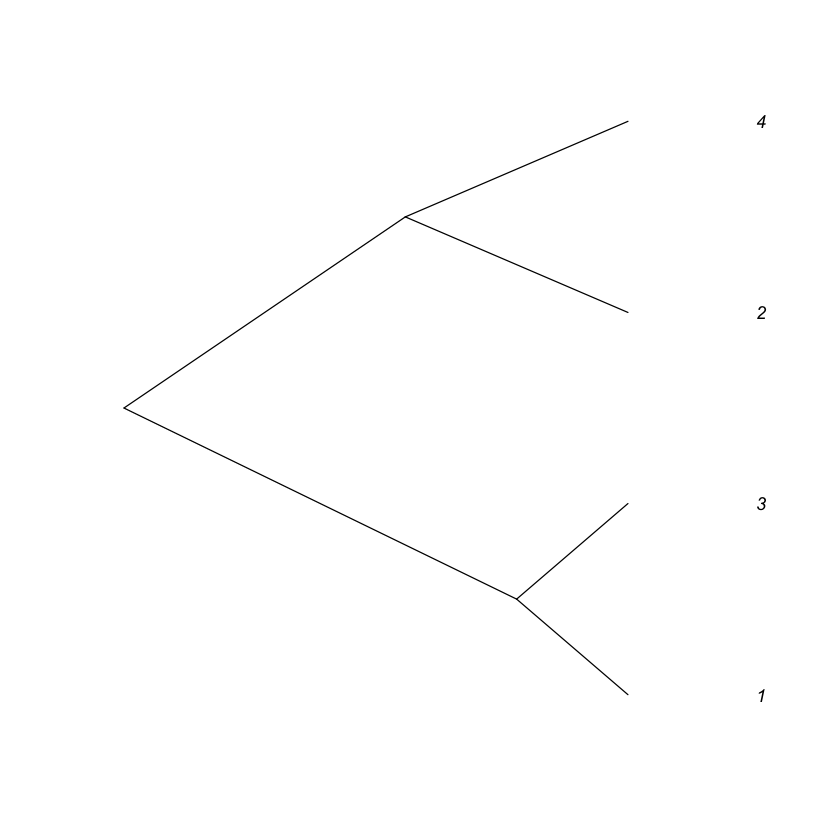

In [98]:
library(ape)
# plot basic tree
plot(as.phylo(hc), cex = 0.9, label.offset = 1)
# cladogram
plot(as.phylo(hc), type="cladogram", cex = 0.9, label.offset = 1)


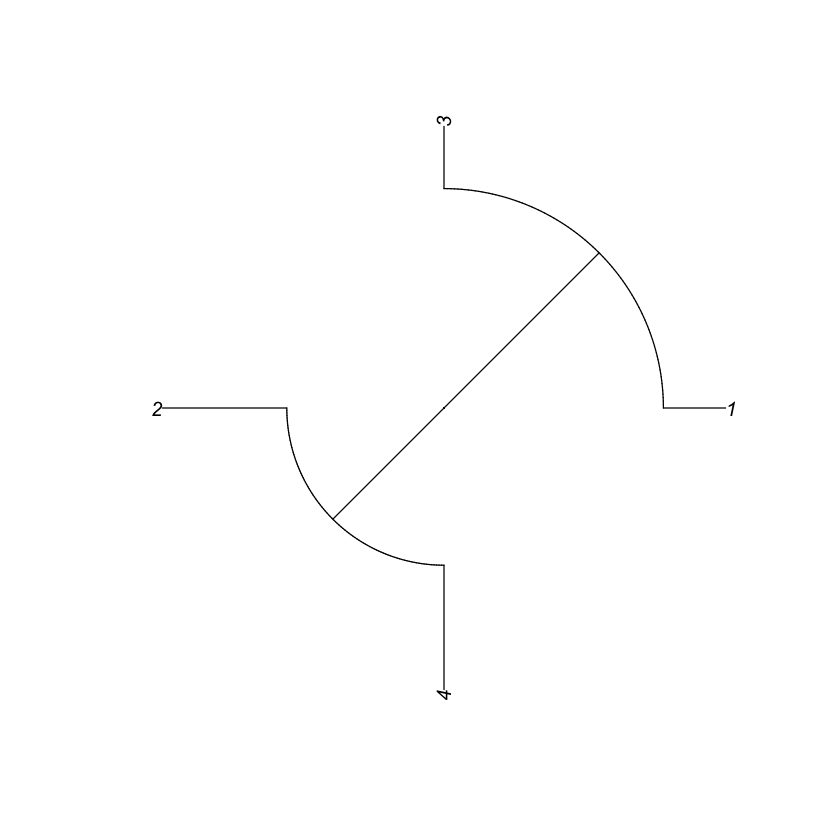

In [99]:
# fan
plot(as.phylo(hc), type = "fan")

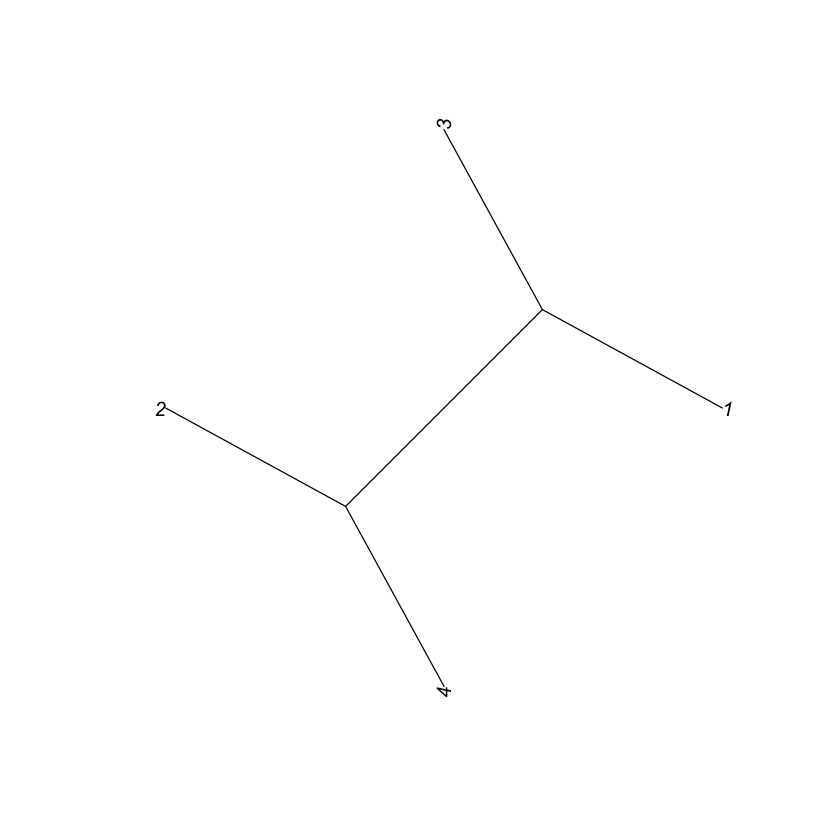

In [100]:
# radial
plot(as.phylo(hc), type = "radial")

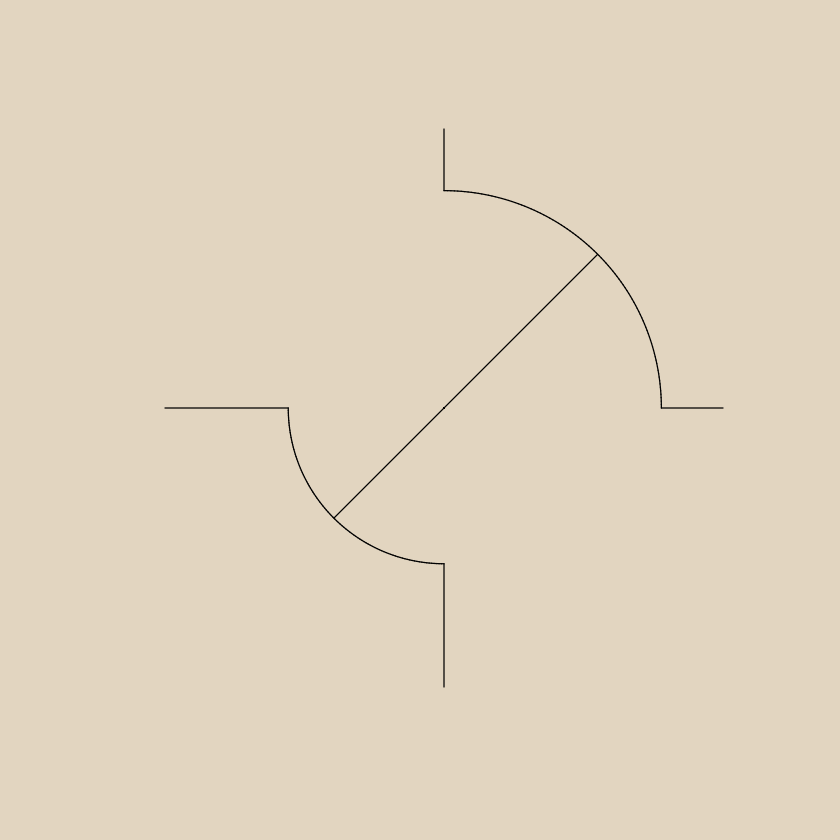

In [101]:
# vector of colors
mypal = c("#556270", "#4ECDC4", "#1B676B", "#FF6B6B", "#C44D58")
# cutting dendrogram in 4 clusters
clus5 = cutree(hc, 4)
# plot
op = par(bg="#E8DDCB")
# Size reflects miles per gallon
plot(as.phylo(hc), type = "fan", tip.color = mypal[clus5], label.offset = 1,
cex = log(mtcars$mpg,10), col = "red")